In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [22]:
ds = load_dataset("chillies/IELTS-writing-task-2-evaluation")
ds

DatasetDict({
    train: Dataset({
        features: ['prompt', 'essay', 'evaluation', 'band'],
        num_rows: 9833
    })
    test: Dataset({
        features: ['prompt', 'essay', 'evaluation', 'band'],
        num_rows: 491
    })
})

In [23]:
train_data = ds['train']
train_df = pd.DataFrame(train_data)

In [24]:
columns_with_nan = train_df.columns[train_df.isna().any()].tolist()
for column in columns_with_nan:
    non_nan_count = train_df[column].notna().sum()
    total_rows = len(train_df)
    print(f"{column}: Non-NaN Count = {non_nan_count}, Total Rows = {total_rows}")

In [25]:
train_df

,prompt,essay,evaluation,band
0,Interviews form the basic criteria for most la...,It is believed by some experts that the tradit...,**Task Achievement: [7]**\nThe essay effective...,7.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r
1,Interviews form the basic selecting criteria f...,Nowadays numerous huge firms allocate an inter...,**Task Achievement:** 5.0\n- The candidate has...,5.0\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r
2,Interview form the basic selection criteria fo...,The interview section is the most vital part o...,## Task Achievement:\n- The candidate has effe...,5.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r
3,Interviews form the basic selection criteria f...,It is argued that the best method to recruit e...,## Task Achievement:\n- The candidate has adeq...,5.5\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r
4,Interviews from the basic selecting criteria f...,Nowadays many companies conduct interviews bef...,**Task Achievement:**\n\nThe essay adequately ...,4\n\n\n\n\n\r\r\r\r\r\r\r\r\r\r\r\r\r
...,...,...,...,...
9828,Nations should spend more money on skills and ...,"These days, many countries use a huge amount o...",### Task Achievement:\nThe essay addresses the...,8
9829,Nations should spend more money on skills and ...,Skills are required in order to achieve succes...,## Task Achievement:\n- The candidate has not ...,<4
9830,Nations should spend more money on skills and ...,There is a contradictory view among the people...,## Task Achievement:\n- The essay adequately a...,7
9831,Nations should spend more money on skills and ...,Many today feel that countries should prioriti...,## Task Achievement:\n- The candidate has effe...,7.5


In [26]:
train_df['band'] = train_df['band'].astype(str).replace(r'[\n\r]+', '', regex=True)
score_counts = train_df['band'].value_counts().sort_index()
print(score_counts)

band
4       594
4.5     646
5      1048
5.0       1
5.5     955
6      1143
6.5    1168
7      1358
7.5    1105
8       700
8.5     433
9       108
<4      574
Name: count, dtype: int64


In [28]:
train_df['band'] = train_df['band'].astype(str).replace(r'\.0$', '', regex=True)
score_counts = train_df['band'].value_counts().sort_index()
print(score_counts)

band
4       594
4.5     646
5      1049
5.5     955
6      1143
6.5    1168
7      1358
7.5    1105
8       700
8.5     433
9       108
<4      574
Name: count, dtype: int64


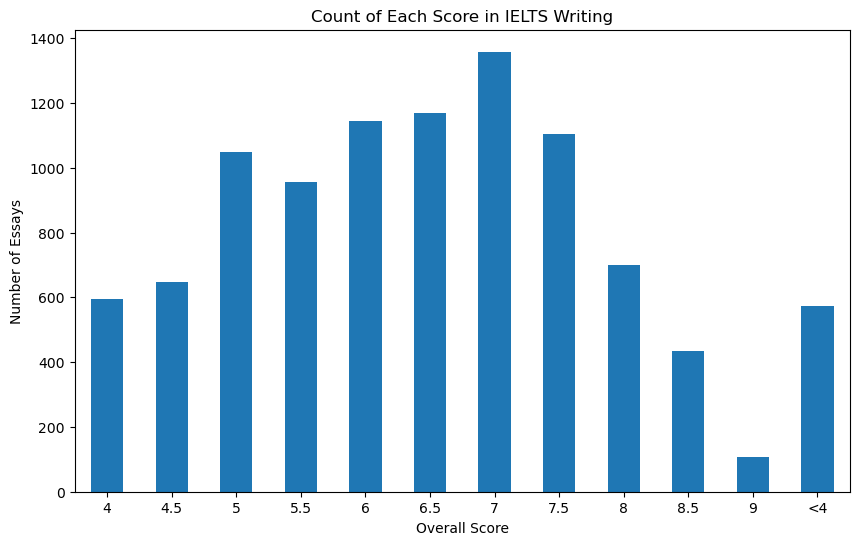

In [29]:
score_counts = train_df['band'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Count of Each Score in IELTS Writing')
plt.xlabel('Overall Score')
plt.ylabel('Number of Essays')
plt.xticks(rotation=0)
plt.show()

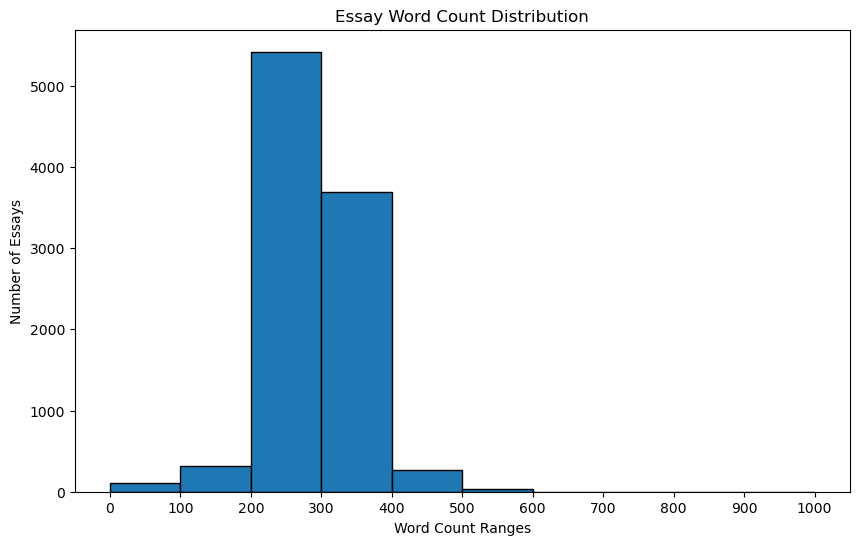

In [31]:
train_df['word_count'] = train_df['essay'].apply(lambda x: len(x.split()))
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.figure(figsize=(10, 6))
plt.hist(train_df['word_count'], bins=bins, edgecolor='black')
plt.title('Essay Word Count Distribution')
plt.xlabel('Word Count Ranges')
plt.ylabel('Number of Essays')
plt.xticks(bins)
plt.show()